In [ ]:
import matplotlib.pyplot as plt
import numpy as np

[6, 6]
[7, 7]
[8, 7]


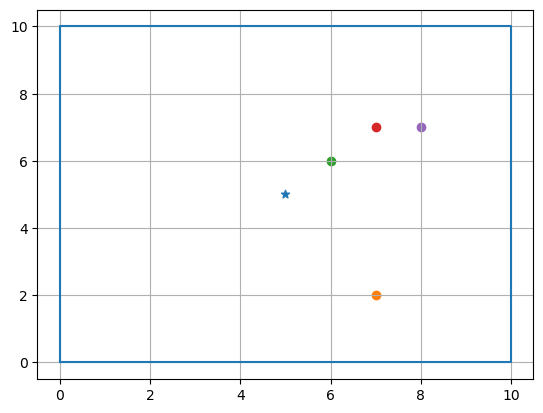

In [ ]:
robot_pos =  [5,5]
goal_pos = [7,2]

def dibujar():
    plt.grid(True)
    plt.scatter(robot_pos[0], robot_pos[1], marker = "*") # dibuja la posicion del robot
    plt.scatter(goal_pos[0], goal_pos[1]) # dibula la posicion de la meta
    plt.plot([0,0,10, 10,0], [0,10,10,0,0]) # dibuja un cuadro delimitando el espacio de trabajo

dibujar()

# stopx = abs(goal_pos[0] - robot_pos[0]) + 1
# stopy = abs(goal_pos[1] - robot_pos[1]) + 1

# for i in range(stopx):
#     print(robot_pos[0])
#     plt.scatter(robot_pos[0] + i, robot_pos[1], marker="*")

# robot_pos[0] += stopy -1

# for i in range(1, abs(goal_pos[1] - robot_pos[1])+1):
#     print(i)
#     plt.scatter(robot_pos[0]-1, robot_pos[1]-i, marker = "+")

    
dx = robot_pos[0] - goal_pos[0]
dy = robot_pos[1] - goal_pos[1]

robot_pos =  [5,5]
goal_pos = [8,7]
pos = robot_pos[:]

while pos[0] != goal_pos[0] or pos[1] != goal_pos[1]:
    if pos[0]>goal_pos[0]:
        pos[0]-=1
    if pos[0]<goal_pos[0]:
        pos[0]+=1
    if pos[1]>goal_pos[1]:
        pos[1]-=1
    if pos[1]<goal_pos[1]:
        pos[1]+=1

    print(pos)
    plt.scatter(pos[0], pos[1], marker = "o")
        

In [319]:
def dibujar(gp):
    plt.grid(True)
    plt.scatter(gp[0], gp[1]) # dibula la posicion de la meta
    plt.plot([0,0,10, 10,0], [0,10,10,0,0]) # dibujamos un cuadro delimitando el espacio de trabajo

In [320]:
def es_punto_valido(punto, obstaculos, limites):
    # esta en el limite permitido?
    if limites[0] <= punto[0] <= limites[2] and limites[1] <= punto[1] <= limites[3] :
        # Hay colision
        for o in obstaculos:
            if o.en_colision(punto):
                return False
        return True
    return False

class Nodo():
    def __init__(self, pos):
        self.pos = pos
        self.hijos = []

    def genera_hijos(self, obstaculos, limites):
        # uno arriba
        pos_arriba = self.pos[:]
        pos_arriba[1] += 1

        # uno abajo
        pos_abajo = self.pos[:]
        pos_abajo[1] -= 1
        
        # uno izq
        pos_izq = self.pos[:]
        pos_izq [0] -= 1
        
        # uno der
        pos_der = self.pos[:]
        pos_der[0] += 1
        
        # diagonales

        if es_punto_valido(pos_arriba, obstaculos, limites):
            self.hijos.append(Nodo(pos_arriba))

        if es_punto_valido(pos_abajo, obstaculos, limites):
            self.hijos.append(Nodo(pos_abajo))
        
        if es_punto_valido(pos_izq, obstaculos, limites):
            self.hijos.append(Nodo(pos_izq))
        
        if es_punto_valido(pos_der, obstaculos, limites):
            self.hijos.append(Nodo(pos_der))

    def __eq__(self, n2):
        return self.pos == n2.pos

    def __str__(self):
        print(self.pos)

    def bpp(self, meta, robot, visitados = []):
        
        if self.pos == meta:
            return [self]
        
        if self in visitados:
            return None
        
        self.genera_hijos(robot.obstaculos, robot.limites)
        visitados.append(self)

        for h in self.hijos:
            resp = h.bpp(meta, robot, visitados)
            if resp:
                
                resp.append(self)
                return resp
        return None



In [321]:
class Robot():
    def __init__(self, pos = [5,5], limites = [0,0,10,10], obstaculos = []):
        self.pos = pos
        self.limites = limites
        self.obstaculos = obstaculos
        self.trajectory = []
    
    def agrega_obstaculo(self, obs):
        self.obstaculos.append(obs)

    def plot_robot(self):
        plt.scatter(self.pos[0], self.pos[1])

    def BPP(self, meta, visitados = []):
        raiz = Nodo(self.pos)
        camino = raiz.bpp(meta, self)
        self.trajectory = []
        for paso in camino:
            self.trajectory += paso.pos
        return camino
        


In [322]:
class Obstaculo():
    def __init__(self, v1, v2):
        self.v1 = v1 # esquina superior
        self.v2 = v2 # esquina inferior

    def en_colision(self, punto):
        if self.v1[0] <= punto[0] <= self.v2[0] and self.v2[1] <= punto[1] <= self.v1[1]:
            return True
        return False
    
    def dibuja(self):
        x = [self.v1[0], self.v2[0], self.v2[0], self.v1[0], self.v1[0]]
        y = [self.v1[1], self.v1[1], self.v2[1], self.v2[1], self.v1[1]]
        plt.plot(x,y)
        


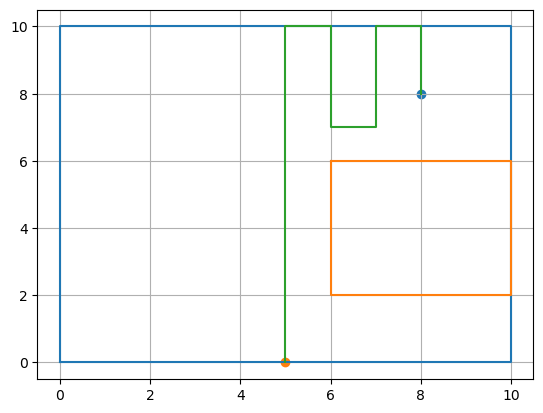

In [323]:
wall_E = Robot([5,0])
wall_E.agrega_obstaculo(Obstaculo([6,6],[10,2]))
dibujar([8,8])
wall_E.obstaculos[0].dibuja()
wall_E.plot_robot()
wall_E.BPP(meta=[8,8])
plt.plot(wall_E.trajectory[0::2], wall_E.trajectory[1::2])

